# Test File for LSPair

## Packages

In [1]:
import sys
import matplotlib
import datetime as dt
import yfinance as yf

from LSPair import *

## Let's get some sample data

In [2]:
try:

    df = pd.read_parquet(
        path = "agency_df.parquet", 
        engine = "pyarrow")

    end_date = dt.date(year = 2023, month = 4, day = 5)
    start_date = dt.date(year = end_date.year - 6, month = 1, day = 1)
  
except:

    tickers = ["CMBS", "VMBS", "MBB"]
    end_date = dt.date(year = 2023, month = 4, day = 5)
    start_date = dt.date(year = end_date.year - 6, month = 1, day = 1)

    df = (yf.download(
        tickers = tickers,
        start = start_date,
        end = end_date).
        reset_index().
        melt(id_vars = "Date").
        rename(columns = {
            "variable_0": "ticker_type", 
            "variable_1": "ticker"}))

    df.to_parquet(
      path = "agency_df.parquet",
      engine = "pyarrow")
  

df = (df.query(
    "ticker_type == 'Adj Close'").
    drop(columns = ["ticker_type"]).
    pivot(index = "Date", columns = "ticker", values = "value").
    pct_change().
    dropna())

## Initialization Tests

Load data in LSPair

In [3]:
ls_pair = LSPair(
    long_position = df.VMBS,
    short_position = df.CMBS,
    benchmark = df.MBB)

### Check regression Stats

In [4]:
def try_fail(test, name):
    try:
        test
        print("[INFO] Successfully Completed {} Test".format(name))
    except:
        print("[ALERT] Failed to Complete {} Test".format(name))
        sys.quit()
        
def try_stat_regression_test():
    
    try_fail(ls_pair.in_sample_long_lm_res, "In-Sample Long Regression")
    try_fail(ls_pair.out_sample_long_lm_res, "Out-Sample Long Regression")
    try_fail(ls_pair.full_sample_long_lm_res, "Full-Sample Long Regression")
    try_fail(ls_pair.in_sample_short_lm_res, "In-Sample Short Regression")
    try_fail(ls_pair.out_sample_short_lm_res, "Out-Sample Short Regression")
    try_fail(ls_pair.full_sample_short_lm_res, "Full-Sample Short Regression")
    print("[INFO] Completed All Regression Sample Tests")
    
try_stat_regression_test()

[INFO] Successfully Completed In-Sample Long Regression Test
[INFO] Successfully Completed Out-Sample Long Regression Test
[INFO] Successfully Completed Full-Sample Long Regression Test
[INFO] Successfully Completed In-Sample Short Regression Test
[INFO] Successfully Completed Out-Sample Short Regression Test
[INFO] Successfully Completed Full-Sample Short Regression Test
[INFO] Completed All Regression Sample Tests


## Plotting Test

[INFO] Successfully Completed In-Sample Regression Test
[INFO] Successfully Completed Out-of-Sample Regression Test
[INFO] Successfully Completed Ful-Sample Regression Test


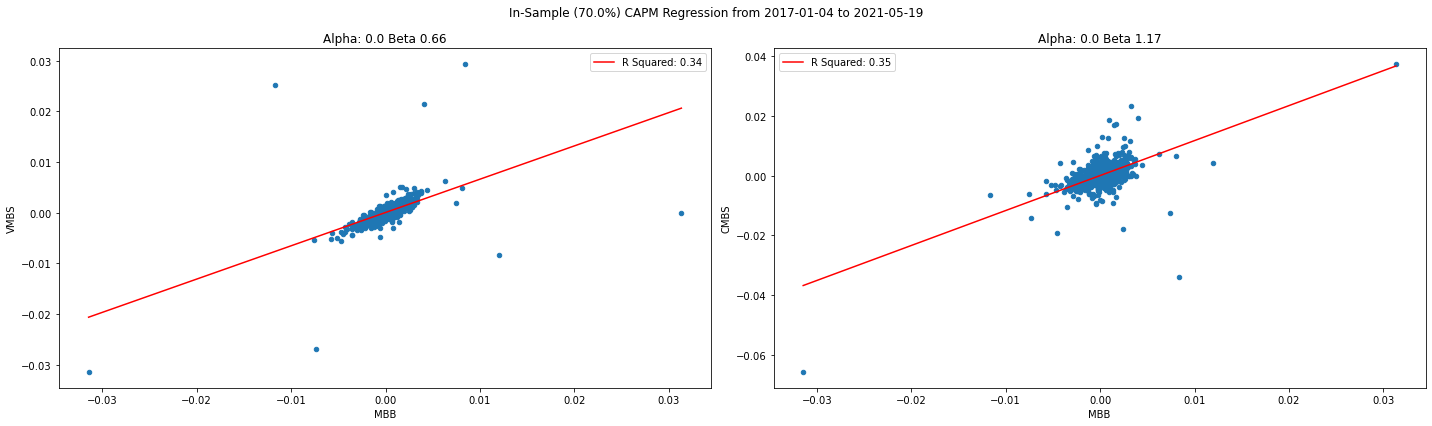

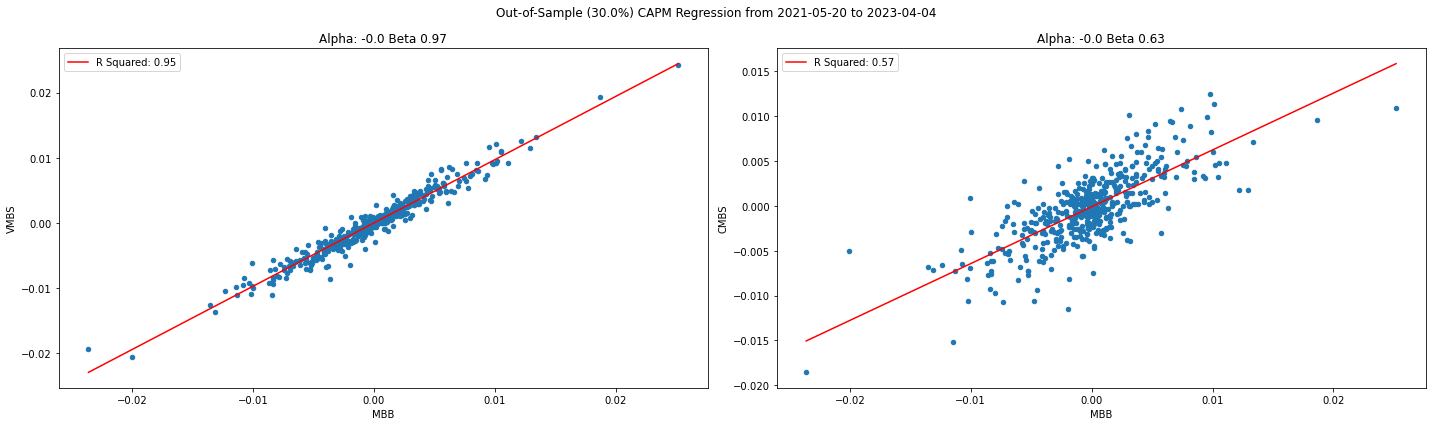

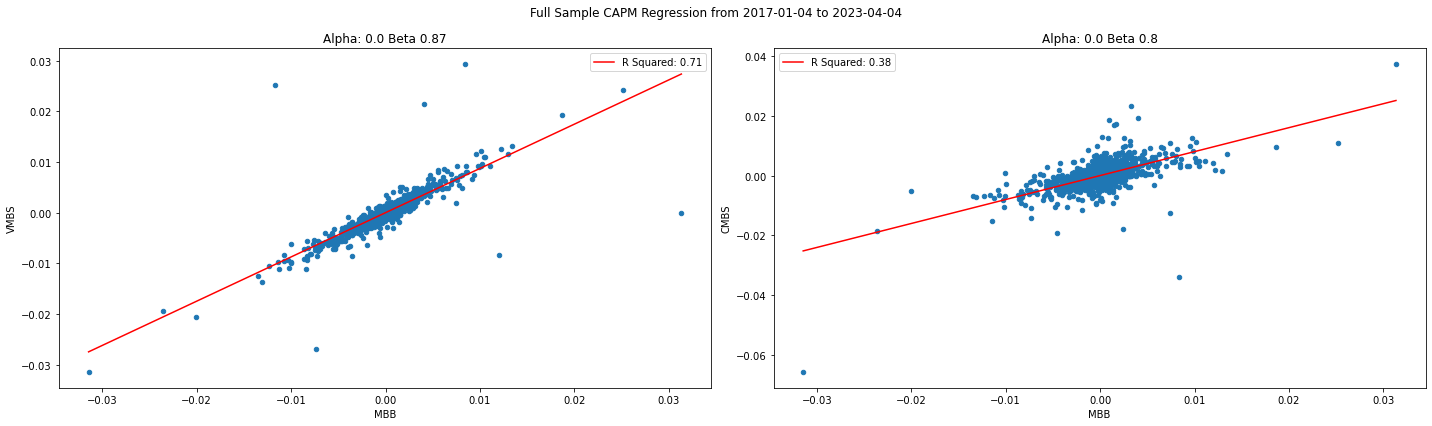

In [5]:
try_fail(ls_pair.plot_regress(), "In-Sample Regression")
try_fail(ls_pair.plot_out_regress(), "Out-of-Sample Regression")
try_fail(ls_pair.plot_full_regress(), "Ful-Sample Regression")

C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:391: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[INFO] Successfully Completed Cumualative Returns with fill Test


C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:391: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[INFO] Successfully Completed Cumualative Returns with fill Test


C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:391: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[INFO] Successfully Completed Cumualative Returns with fill Test


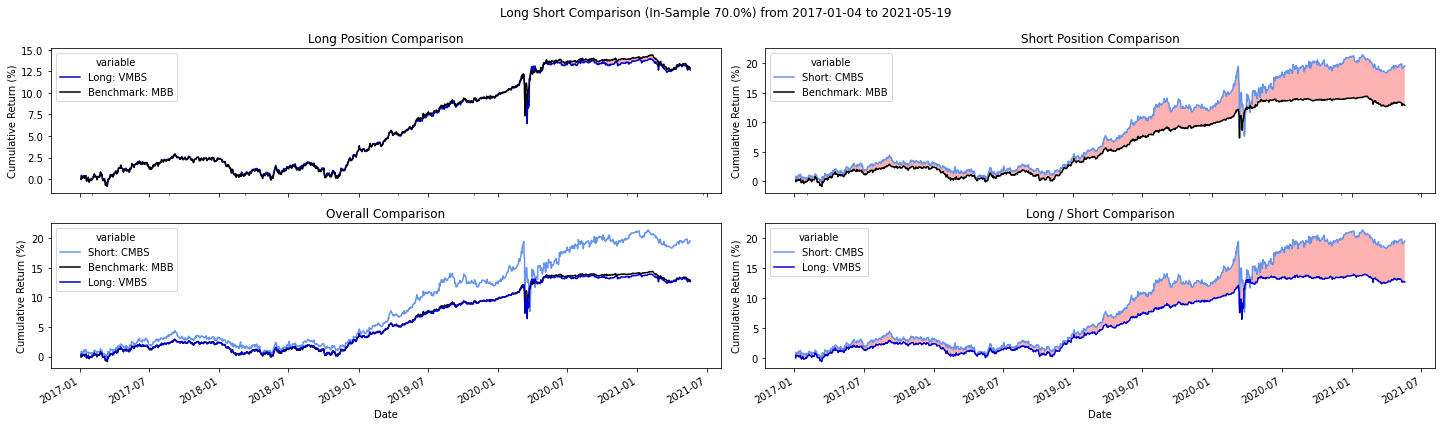

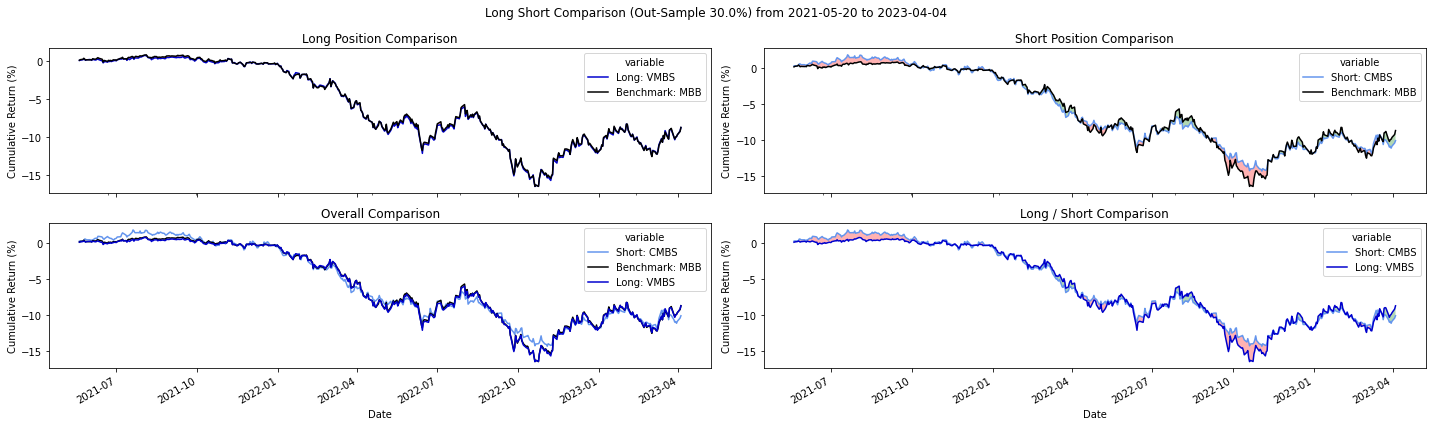

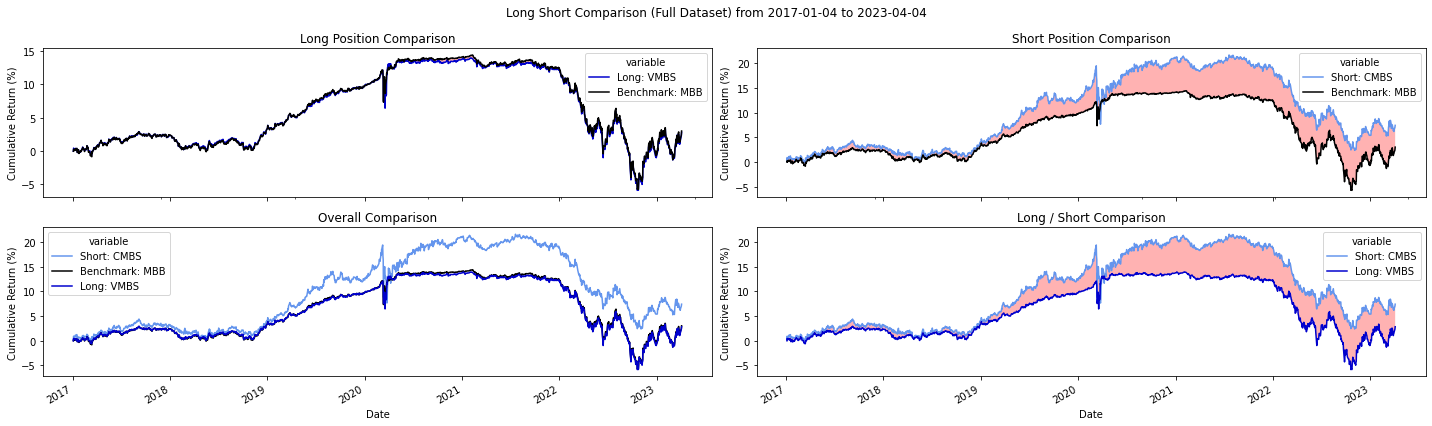

In [6]:
try_fail(ls_pair.plot_cum(), "Cumualative Returns with fill")
try_fail(ls_pair.plot_out_sample_cum(), "Cumualative Returns with fill")
try_fail(ls_pair.plot_full_sample_cum(), "Cumualative Returns with fill")

C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:391: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[INFO] Successfully Completed In-Sample Cumualative Returns with fill Test


C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:391: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[INFO] Successfully Completed Out-of-Sample Cumualative Returns with fill Test


C:\Users\Diego\Desktop\app_prod\LSPair\LSPair.py:391: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[INFO] Successfully Completed Full-Sample Cumualative Returns with fill Test


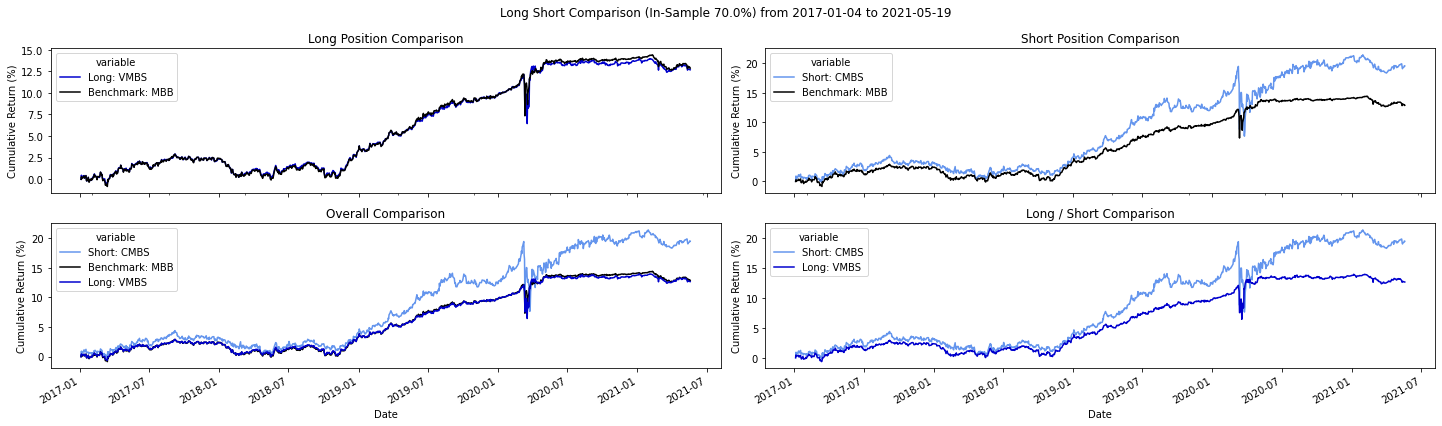

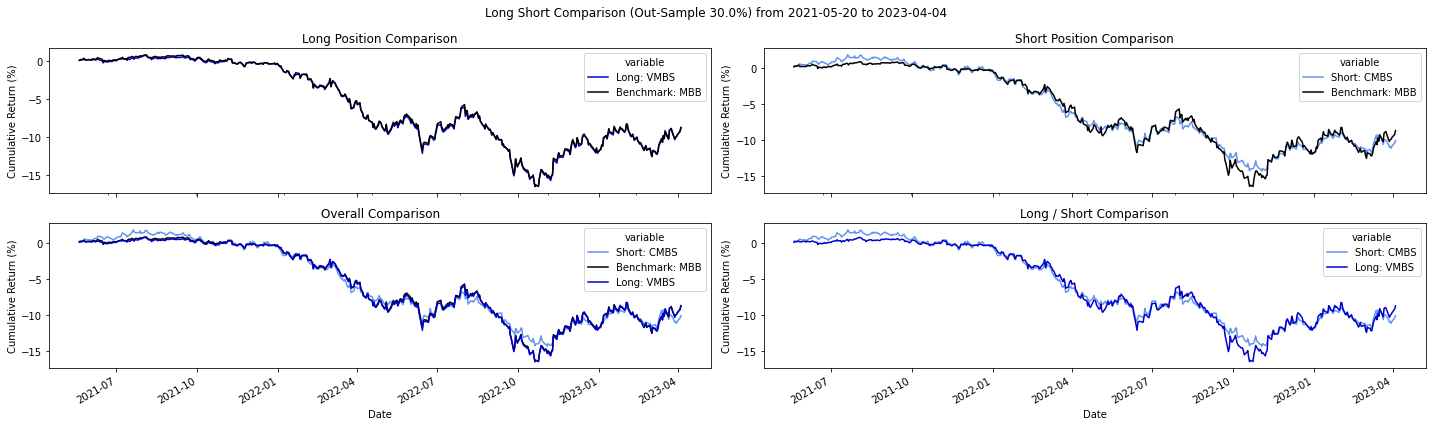

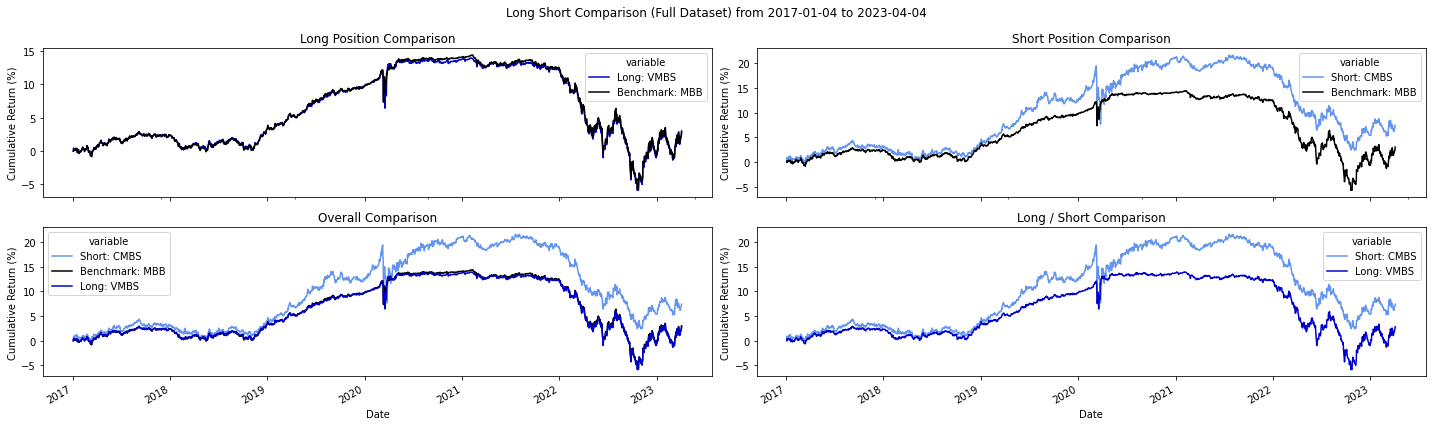

In [7]:
try_fail(ls_pair.plot_cum(fill = False), "In-Sample Cumualative Returns with fill")
try_fail(ls_pair.plot_out_sample_cum(fill = False), "Out-of-Sample Cumualative Returns with fill")
try_fail(ls_pair.plot_full_sample_cum(fill = False), "Full-Sample Cumualative Returns with fill")

## Even Rebalance

[INFO] Successfully Completed Even Rebalance plot with fill Test
[INFO] Successfully Completed Even Rebalance plot without fill Test


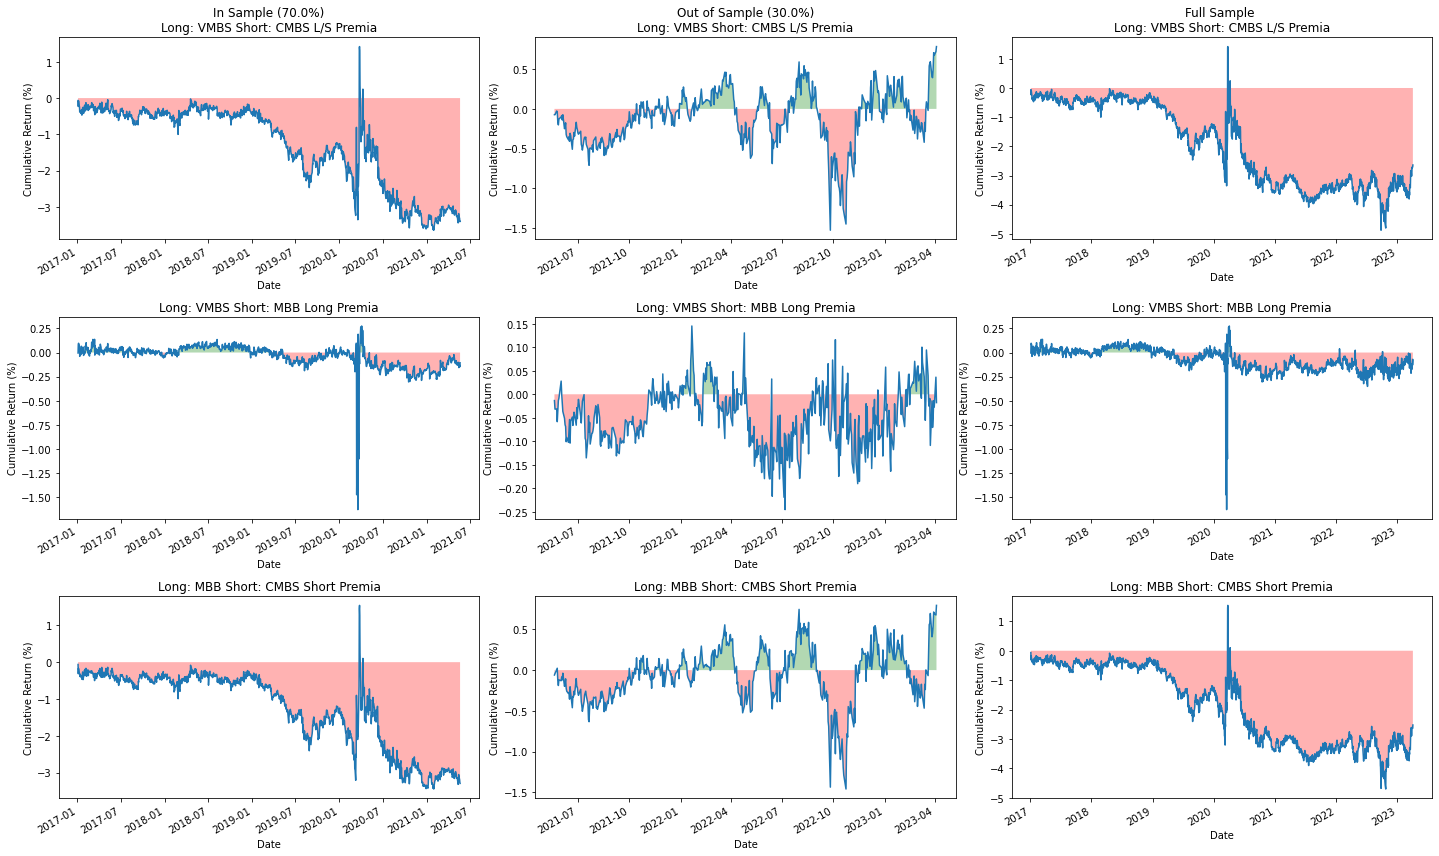

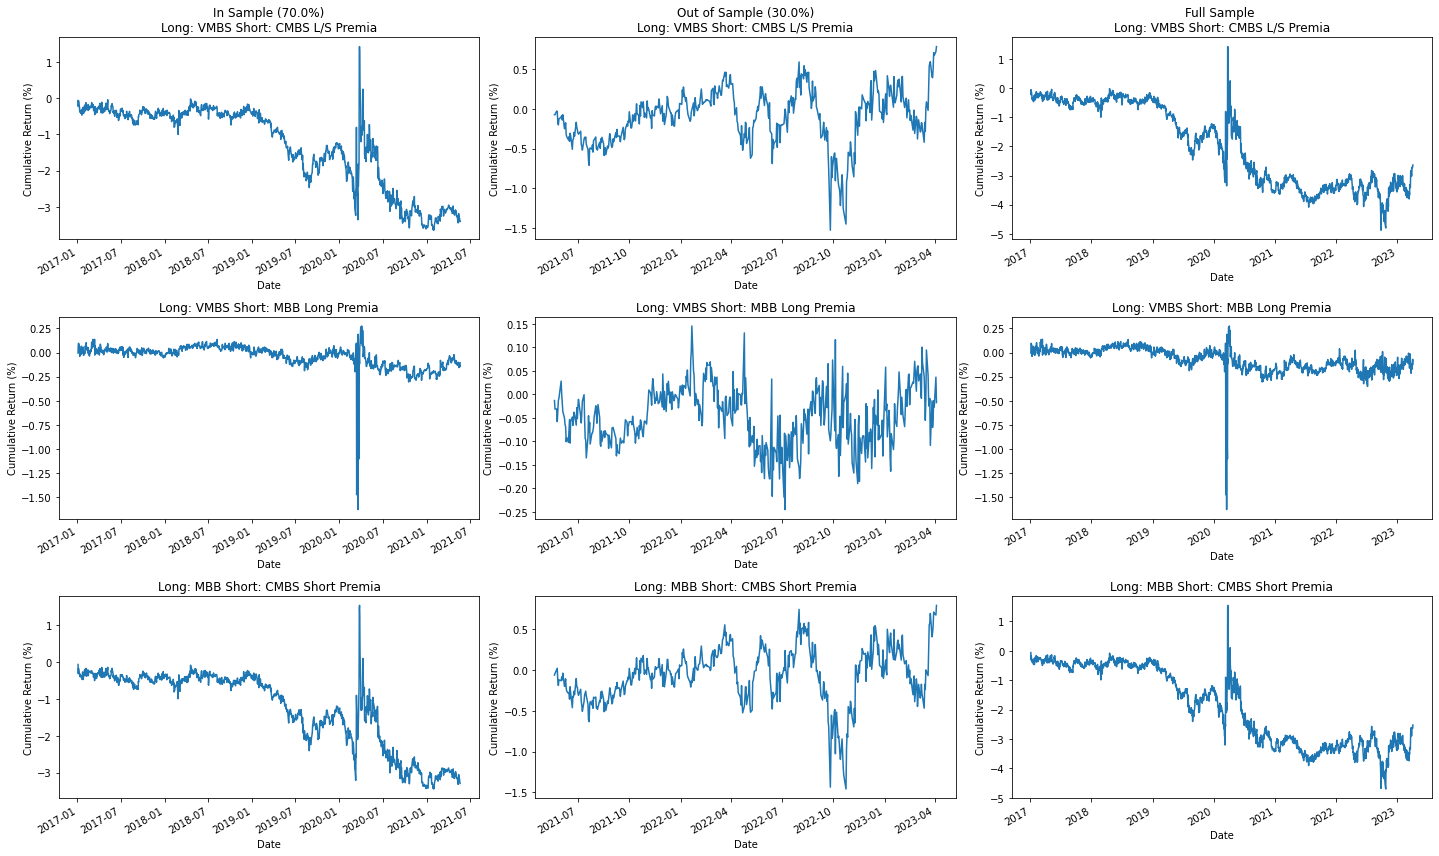

In [8]:
try_fail(ls_pair.generate_even_rebal_risk_premia(plot = True), "Even Rebalance plot with fill")
try_fail(ls_pair.generate_even_rebal_risk_premia(plot = True, fill = False), "Even Rebalance plot without fill")

## Rolling OLS

In [9]:
try_fail(ls_pair.rolling_ols(), "Rolling OLS")

Working on In-Sample Long Rolling OLS
Working on 30
Working on 60
Working on 90
Working on 252
Working on 504
Working on 756
Working on 1260
There was a problem with 1260
 
Working on Out-of-Sample Long Rolling OLS
Working on 30
Working on 60
Working on 90
Working on 252
Working on 504
There was a problem with 504
Working on 756
There was a problem with 756
Working on 1260
There was a problem with 1260
 
Working on Full-Sample Long Rolling OLS
Working on 30
Working on 60
Working on 90
Working on 252
Working on 504
Working on 756
Working on 1260
 
Working on In-Sample Short Rolling OLS
Working on 30
Working on 60
Working on 90
Working on 252
Working on 504
Working on 756
Working on 1260
There was a problem with 1260
 
Working on Out-of-Sample short Rolling OLS
Working on 30
Working on 60
Working on 90
Working on 252
Working on 504
There was a problem with 504
Working on 756
There was a problem with 756
Working on 1260
There was a problem with 1260
 
Working on Full-Sample short Rolling 

[INFO] Successfully Completed Rolling OLS Plot with Confidence Interval Test
[INFO] Successfully Completed Rolling OLS Plot with Confidence Interval Test


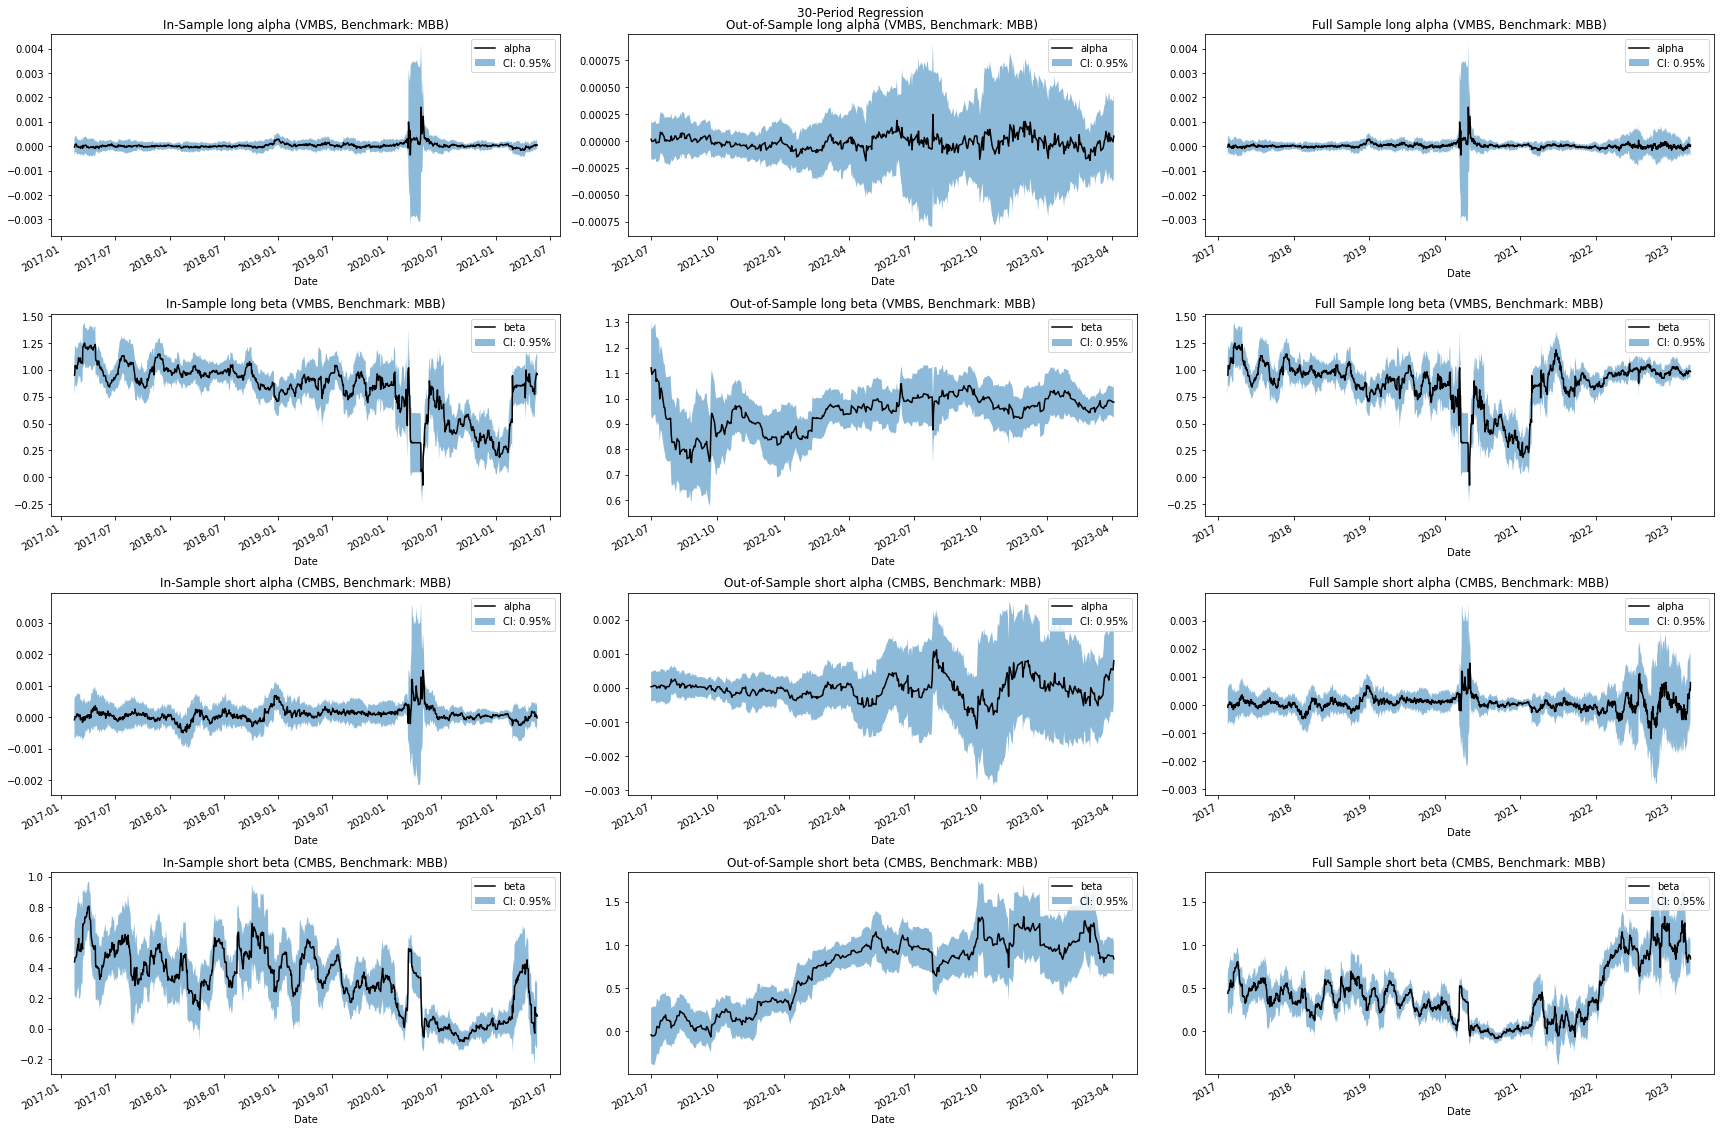

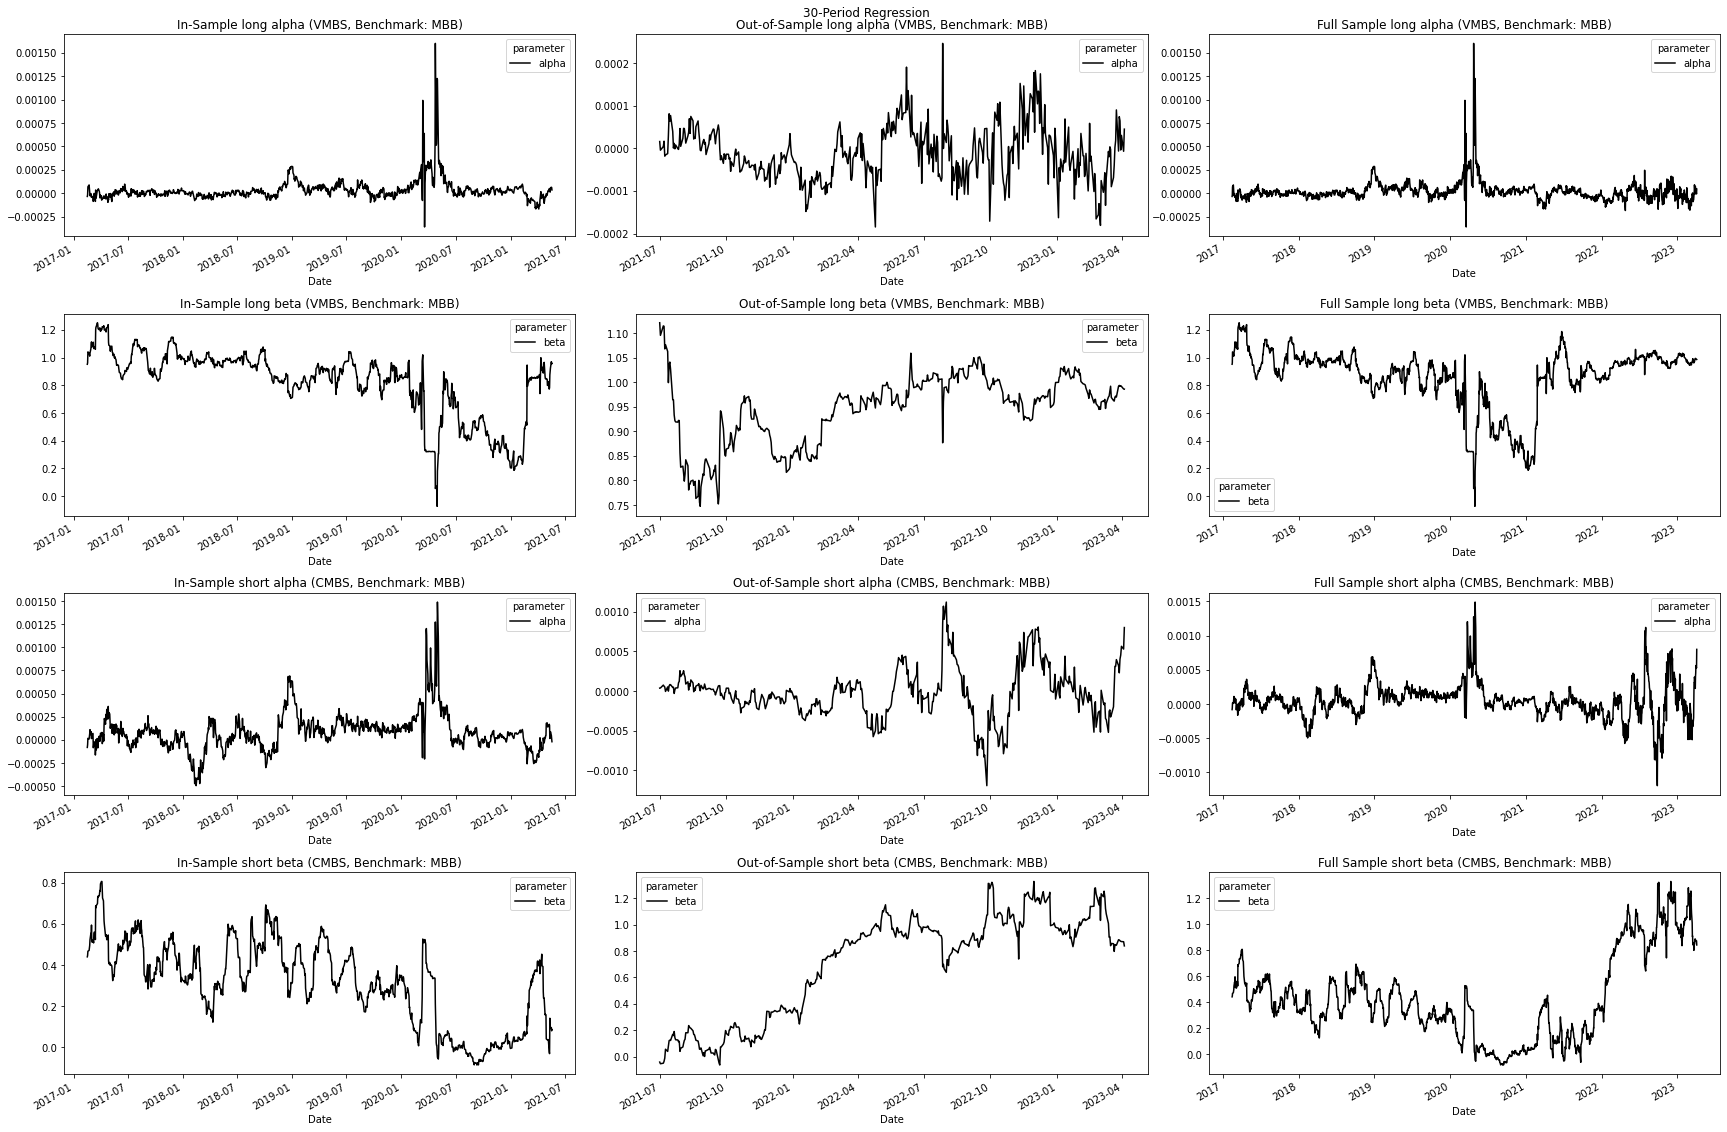

In [10]:
try_fail(ls_pair.plot_single_rolling_ols(window = 30), "Rolling OLS Plot with Confidence Interval")
try_fail(ls_pair.plot_single_rolling_ols(window = 30, fill = False), "Rolling OLS Plot with Confidence Interval")

[INFO] Successfully Completed Rolling OLS Plot comparison without cofidence Test
[INFO] Successfully Completed Rolling OLS Plot comparison with Confidence Interval Test


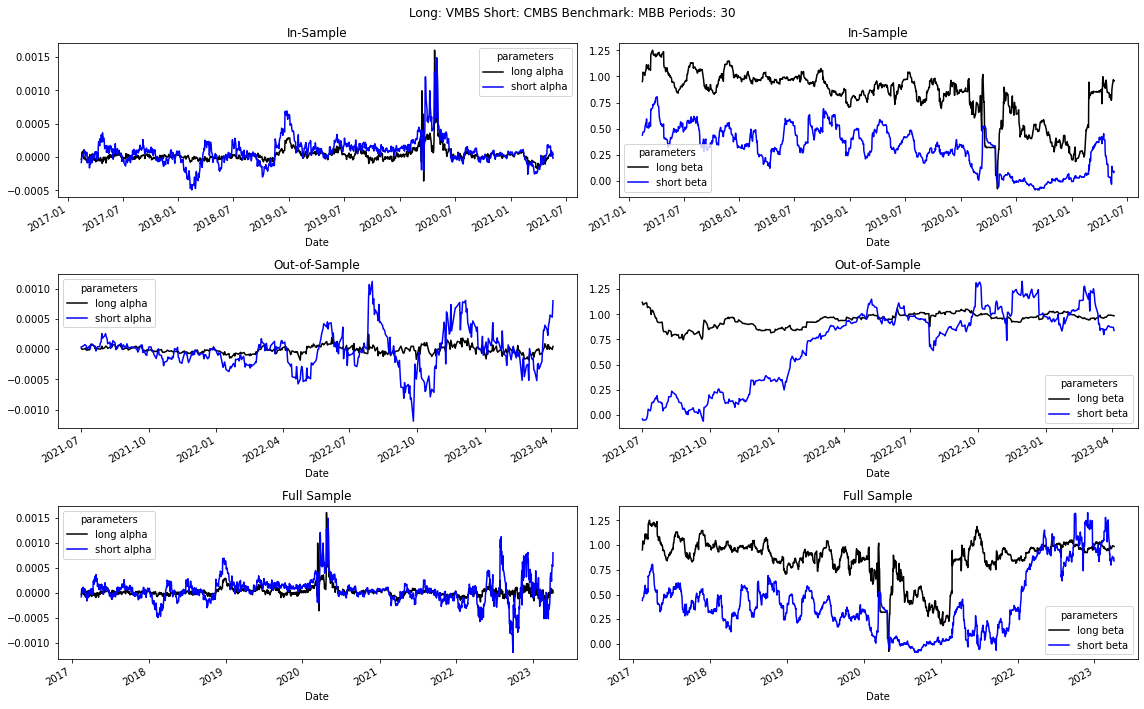

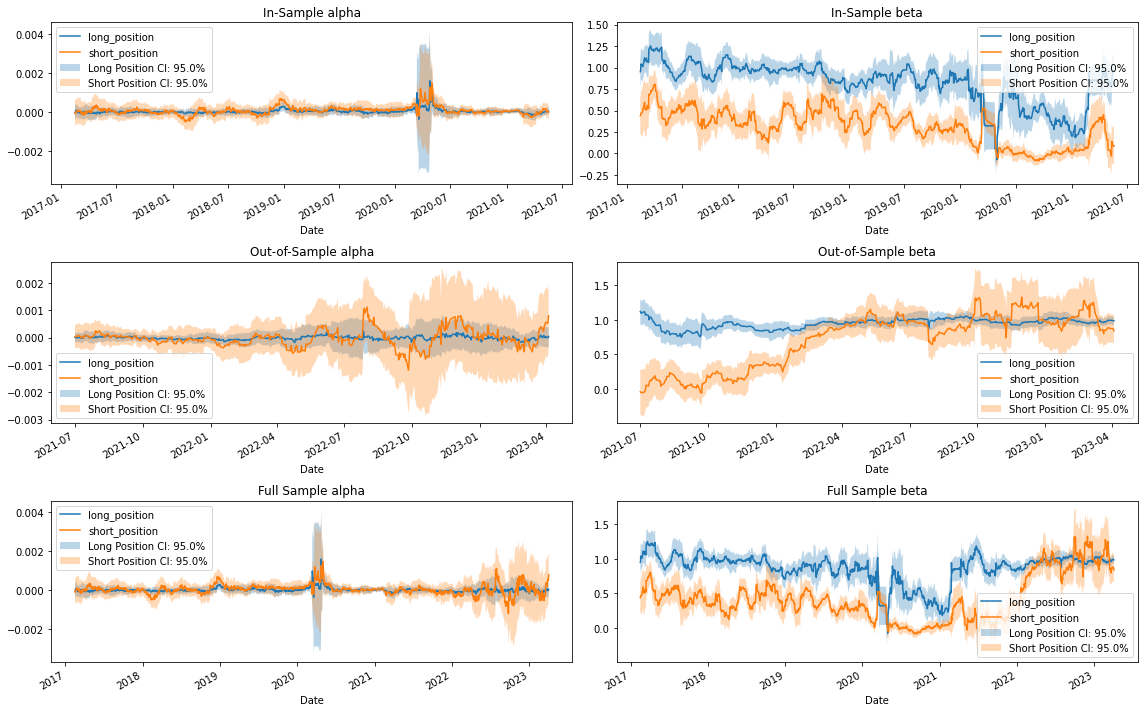

In [11]:
try_fail(ls_pair.plot_single_rolling_ols_comparison(window = 30), "Rolling OLS Plot comparison without cofidence")
try_fail(ls_pair.plot_single_rolling_ols_comparison(window = 30, conf_int = 0.05), "Rolling OLS Plot comparison with Confidence Interval")

[INFO] Successfully Completed Rolling OLS Parameter Comparison Test


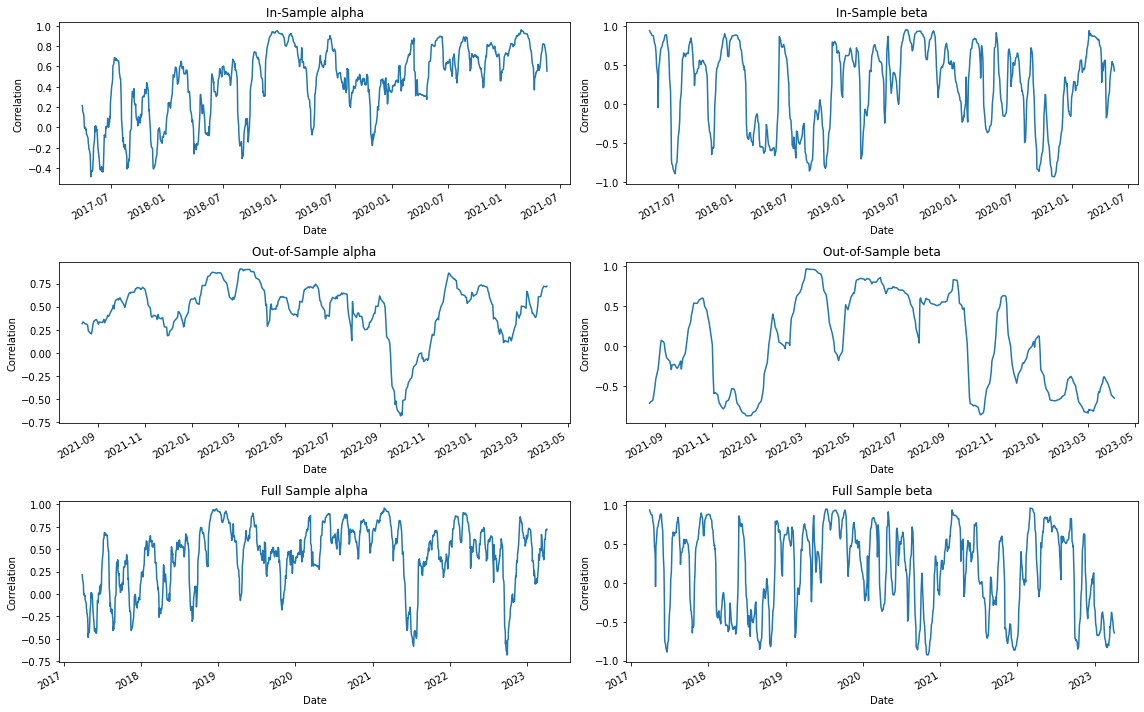

In [12]:
try_fail(ls_pair.plot_single_rolling_ols_parameter_comparison(ols_window = 30, corr_window = 30), "Rolling OLS Parameter Comparison")

[INFO] Successfully Completed Rolling OLS Plot Histogram Test


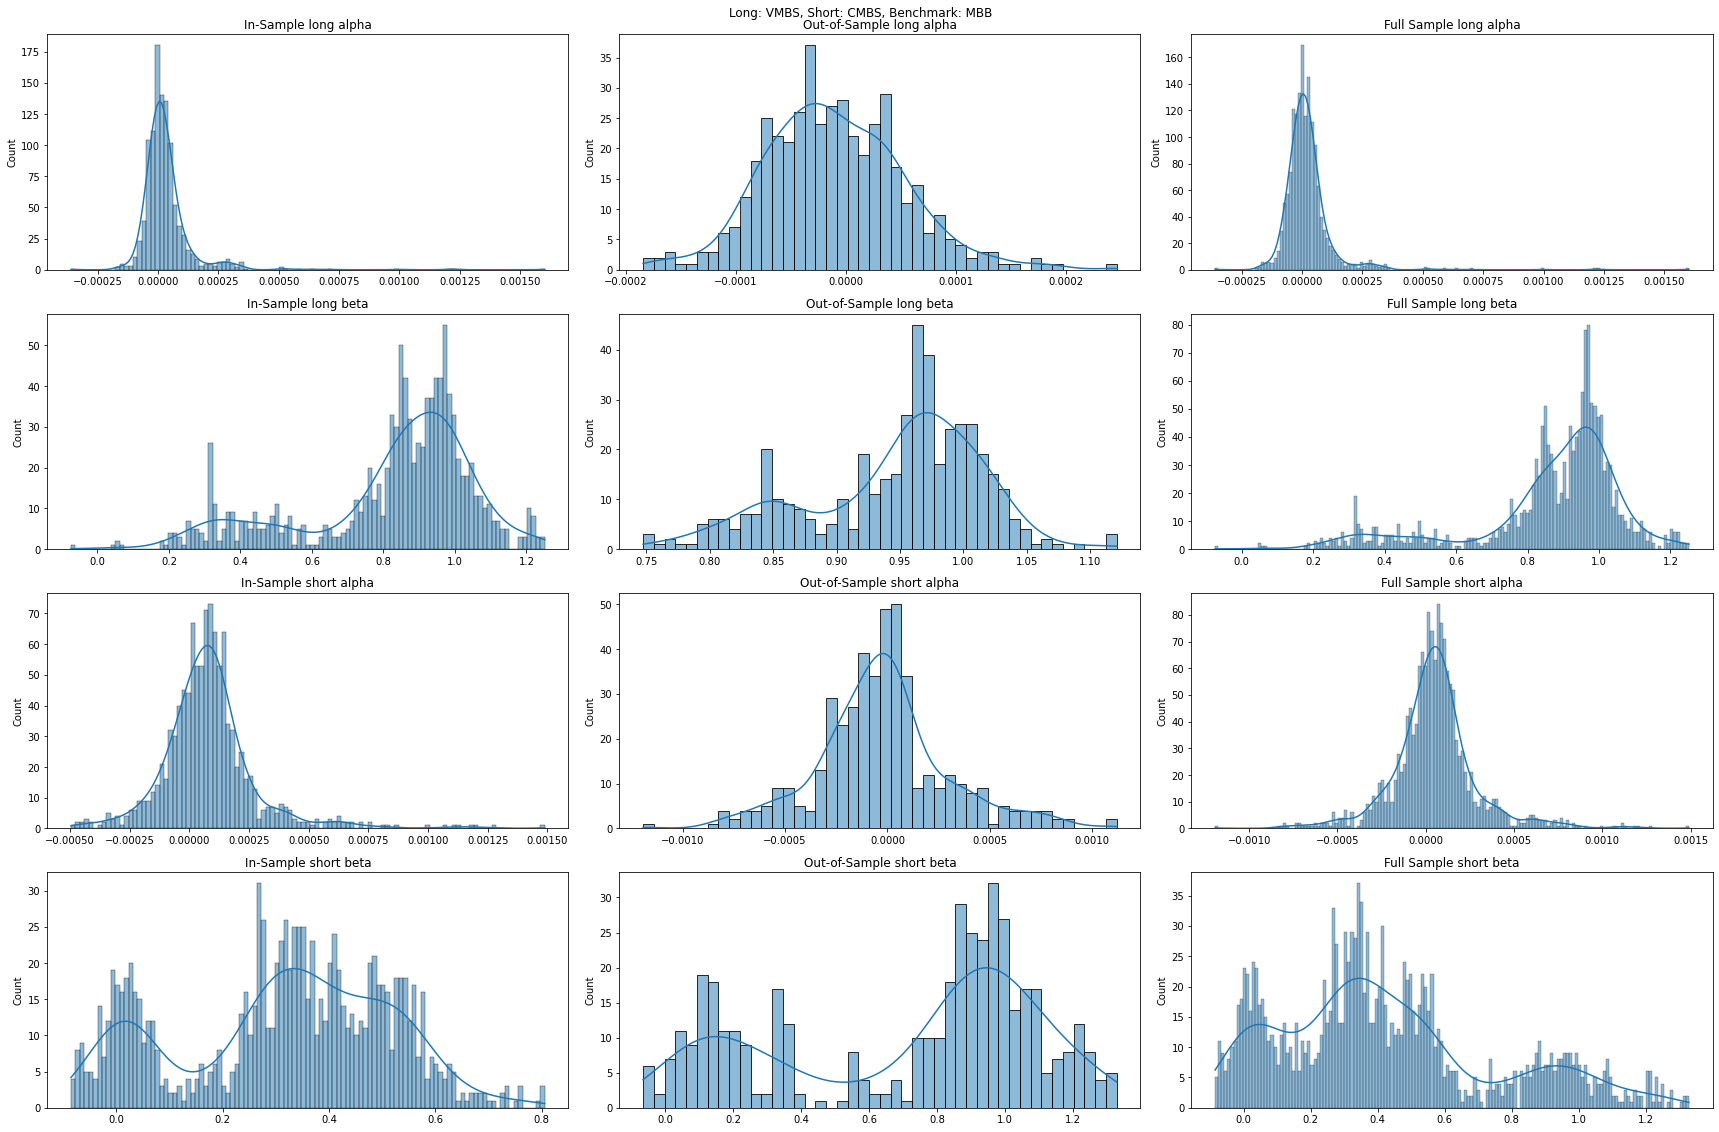

In [13]:
try_fail(ls_pair.plot_single_rolling_ols_hist(ols_window = 30), "Rolling OLS Plot Histogram")

[INFO] Successfully Completed Rolling OLS Plot Histogram Test


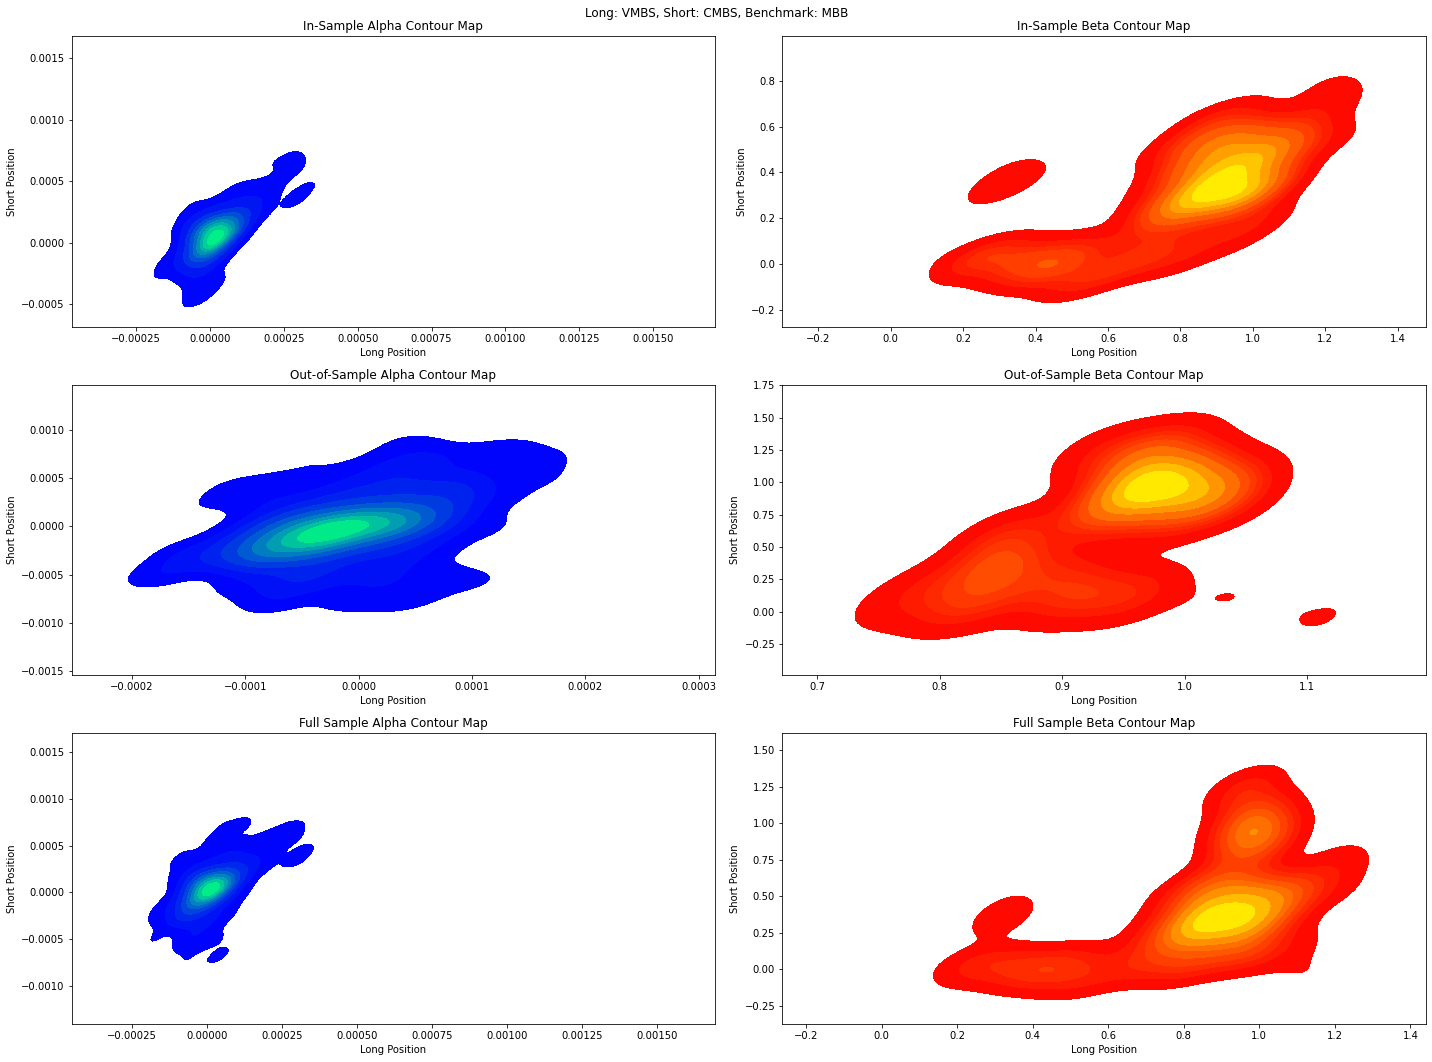

In [14]:
try_fail(ls_pair.plot_single_rolling_ols_contour(ols_window = 30), "Rolling OLS Plot Histogram")